# Final Project - ECommerce Business Trend

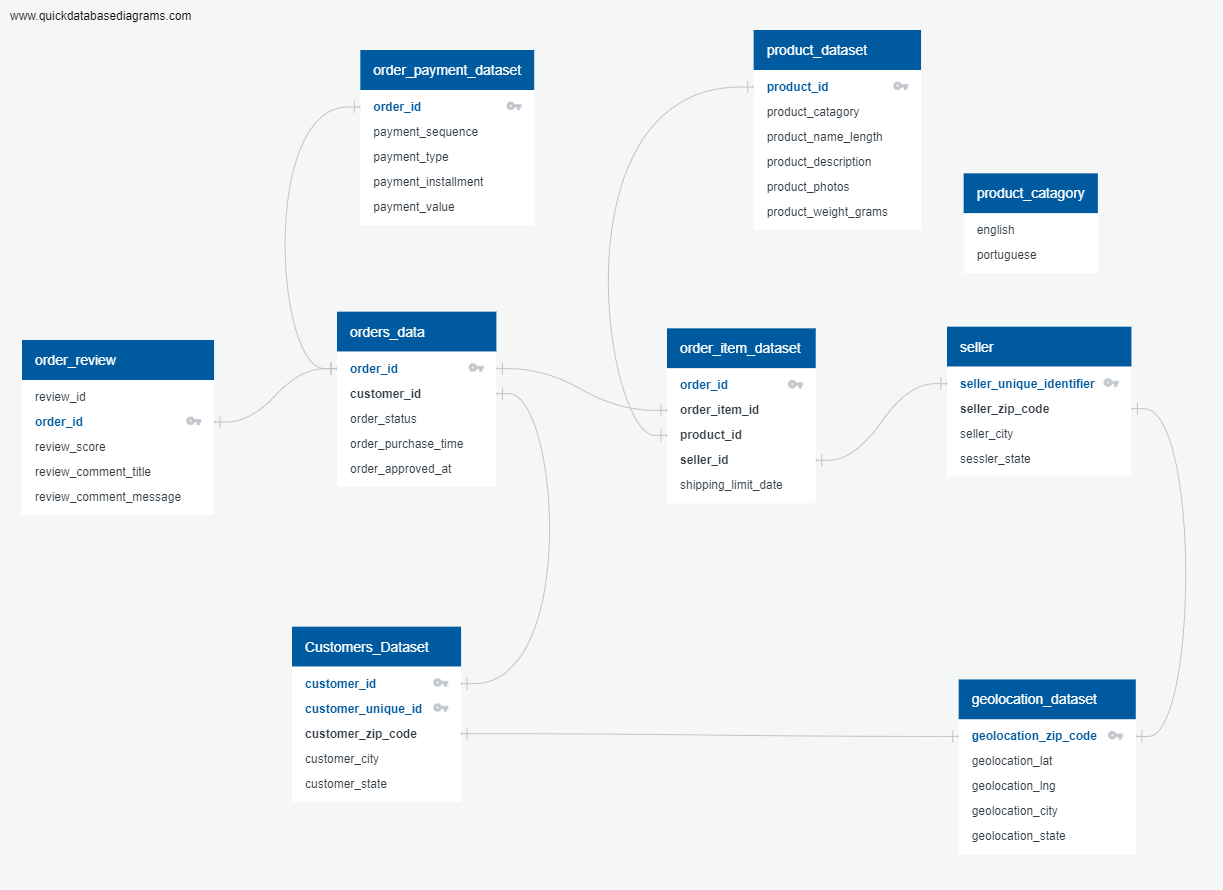

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
customers =  pd.read_csv("productsample.csv") #, infer_datetime_format = True, parse_dates = parse_dates)

In [5]:
customers.head()


,customer_id,order_id,product_id,product_category,zip_code,city,state,price,freight_value
0,077d43174992dd5e7fb9d336890ab289,1ee75dd3dc1076b563a223486e86e7b9,2500fb88ba75d71bd264e88b4da5b44b,telephony,21920,rio de janeiro,RJ,68.90,15.92
1,d7e491aa011edd106624e71e844f2f4b,d7d4afc3fb829c97bf4669cec420064e,103cc8c441a717d9a54fca312ae8ec3c,watches_gifts,78550,sinop,MT,168.90,22.89
2,42da46ef0cdd769b68cea0d88b6bc5ec,bf79d036f5374ea92a94c50341ada3da,2239cf6b4421c4bd57f8a87127800929,office_furniture,23510,rio de janeiro,RJ,129.99,46.40
3,9107a1be2b8b1e2d453bd9d24db120dd,11f10acabb1552521a9a7ca484aabd64,177d3d5bb9d4d29222a222e3b3554f41,stationery,58195,frei martinho,PB,109.00,83.68
4,54c424fd34699c65ea6d0c12a80e4a72,40ebc9d21ae5f5d7dfd398f87e63f455,fd0c762860528d119344e1377b574fc5,food,4205,sao paulo,SP,50.00,7.39


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       150 non-null    object 
 1   order_id          150 non-null    object 
 2   product_id        150 non-null    object 
 3   product_category  150 non-null    object 
 4   zip_code          150 non-null    int64  
 5   city              150 non-null    object 
 6   state             150 non-null    object 
 7   price             150 non-null    float64
 8   freight_value     150 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 10.7+ KB


In [8]:
#customers["product_category"].nunique()
customers["zip_code"].nunique()


148

In [9]:
customers["product_id"].nunique()

144

In [22]:
review = pd.read_csv("olist_order_reviews_dataset.csv")

In [23]:
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [24]:
df_merge = pd.merge(customers, review, on='order_id')


In [25]:
df_merge.head()

,customer_id,order_id,product_id,product_category,zip_code,city,state,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,077d43174992dd5e7fb9d336890ab289,1ee75dd3dc1076b563a223486e86e7b9,2500fb88ba75d71bd264e88b4da5b44b,telephony,21920,rio de janeiro,RJ,68.90,15.92,3e4051347aa31cd748eb6b5ca9283cd7,5,NaN,Avaliação boa,2018-01-20 00:00:00,2018-01-22 21:19:41
1,d7e491aa011edd106624e71e844f2f4b,d7d4afc3fb829c97bf4669cec420064e,103cc8c441a717d9a54fca312ae8ec3c,watches_gifts,78550,sinop,MT,168.90,22.89,84e058867818ed5bcb6d0025454d3f55,5,NaN,"Bonito, pulseira confortável.",2018-04-18 00:00:00,2018-04-20 12:48:19
2,42da46ef0cdd769b68cea0d88b6bc5ec,bf79d036f5374ea92a94c50341ada3da,2239cf6b4421c4bd57f8a87127800929,office_furniture,23510,rio de janeiro,RJ,129.99,46.40,33a4dfb18e78b711de26237112a2d503,2,NaN,O produto não tem boa qualidade.,2017-02-08 00:00:00,2017-02-11 02:39:16
3,9107a1be2b8b1e2d453bd9d24db120dd,11f10acabb1552521a9a7ca484aabd64,177d3d5bb9d4d29222a222e3b3554f41,stationery,58195,frei martinho,PB,109.00,83.68,38aa6cbbae91a2fc782eca72c12af556,4,NaN,NaN,2018-08-03 00:00:00,2018-08-03 17:56:47
4,54c424fd34699c65ea6d0c12a80e4a72,40ebc9d21ae5f5d7dfd398f87e63f455,fd0c762860528d119344e1377b574fc5,food,4205,sao paulo,SP,50.00,7.39,1bc69c42c41fbbd350a1cf7c5a2d72a9,5,NaN,NaN,2018-03-18 00:00:00,2018-03-18 12:30:50


In [26]:
profile = ProfileReport(df_merge, title="Pandas Profiling Report")

In [27]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis

##### 1.  How many customers from eah state
##### 2.  within a state which zipcodes have most customers
##### 3. Which city has the most customers
##### 4. which zipcode has the most customers
##### 5. Is the customer base increasing using datetime
##### 6. Which product catagoy is hot
##### 7. any relation between the location and product catagory
##### 8. Repeat purchase.  

##### 8. Tableau

In [12]:
top_product_catagories = df_merge['product_category'].value_counts().head(50)

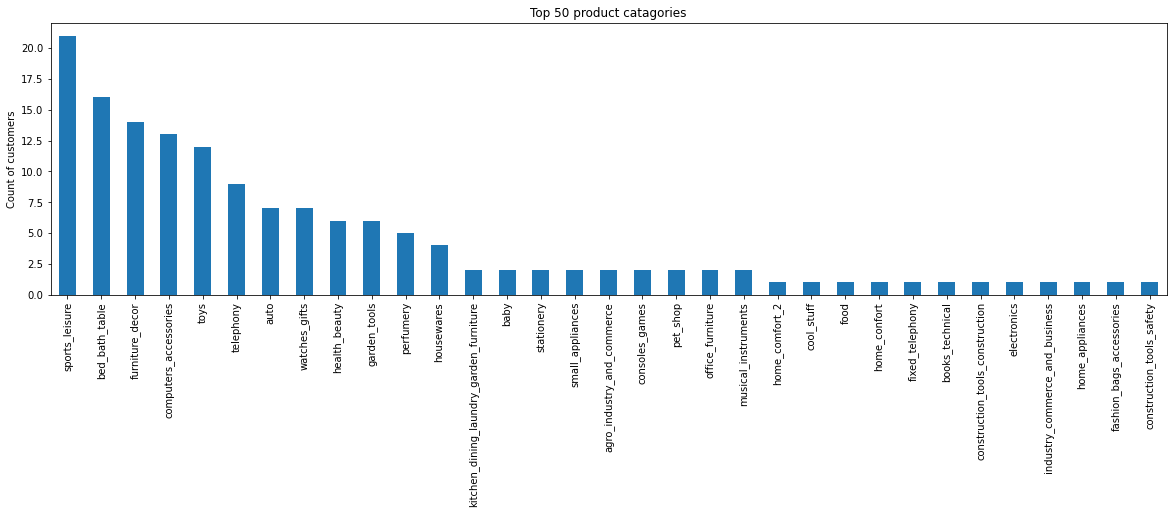

In [13]:
top_product_catagories.plot(kind='bar', figsize=(20, 5))


plt.title('Top 50 product catagories')
plt.ylabel('Count of customers');

In [14]:
top_50_states = customers['state'].value_counts().head(50)

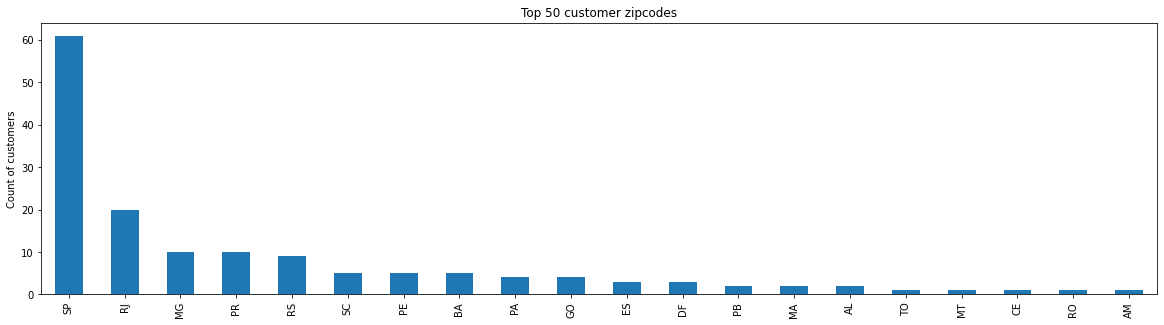

In [15]:
top_50_states.plot(kind='bar', figsize=(20, 5))
plt.title('Top 50 customer zipcodes')
plt.ylabel('Count of customers');

In [16]:
top_50_zipcodes = customers['zip_code'].value_counts().head(50)

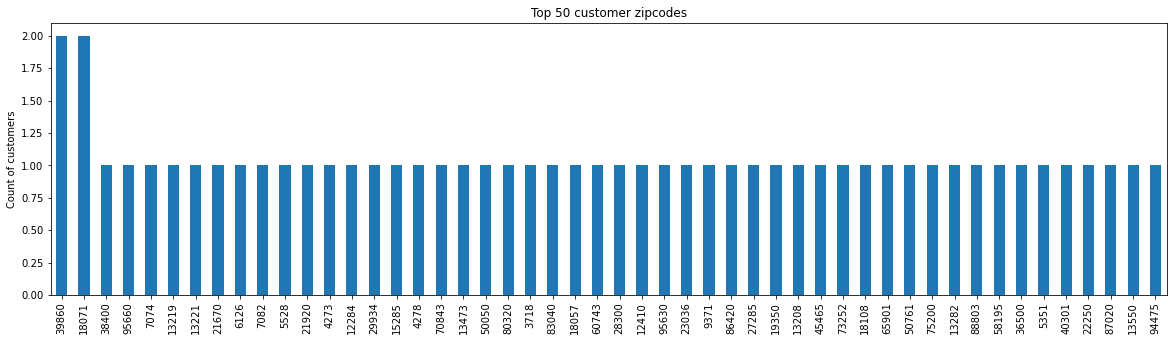

In [17]:
top_50_zipcodes.plot(kind='bar', figsize=(20, 5))
plt.title('Top 50 customer zipcodes')
plt.ylabel('Count of customers');

# Logistic Regression

In [30]:
df_merge.isna().count()

customer_id                153
order_id                   153
product_id                 153
product_category           153
zip_code                   153
city                       153
state                      153
price                      153
freight_value              153
review_id                  153
review_score               153
review_comment_title       153
review_comment_message     153
review_creation_date       153
review_answer_timestamp    153
dtype: int64

In [60]:
df_merge.head()

,product_category,zip_code,state,price,freight_value,review_score
0,telephony,21920,RJ,68.90,15.92,5
1,watches_gifts,78550,MT,168.90,22.89,5
2,office_furniture,23510,RJ,129.99,46.40,2
3,stationery,58195,PB,109.00,83.68,4
4,food,4205,SP,50.00,7.39,5


In [31]:
df_merge.drop(columns='customer_id', inplace = True)
df_merge.drop(columns='order_id', inplace = True)
df_merge.drop(columns='product_id', inplace = True)
df_merge.drop(columns='city', inplace = True)
df_merge.drop(columns='review_id', inplace = True)
df_merge.drop(columns='review_comment_title', inplace = True)
df_merge.drop(columns='review_comment_message', inplace = True)
df_merge.drop(columns='review_creation_date', inplace = True)
df_merge.drop(columns='review_answer_timestamp', inplace = True)


df_merge.head()


,product_category,zip_code,state,price,freight_value,review_score
0,telephony,21920,RJ,68.90,15.92,5
1,watches_gifts,78550,MT,168.90,22.89,5
2,office_furniture,23510,RJ,129.99,46.40,2
3,stationery,58195,PB,109.00,83.68,4
4,food,4205,SP,50.00,7.39,5


In [61]:
Xdata = df_merge.iloc[:, 0:-1]
ydata = df_merge.iloc[:, -1]

In [62]:
Xdata.shape

(153, 5)

In [63]:
Xdata


,product_category,zip_code,state,price,freight_value
0,telephony,21920,RJ,68.90,15.92
1,watches_gifts,78550,MT,168.90,22.89
2,office_furniture,23510,RJ,129.99,46.40
3,stationery,58195,PB,109.00,83.68
4,food,4205,SP,50.00,7.39
...,...,...,...,...,...
148,computers_accessories,6765,SP,21.99,25.63
149,telephony,50761,PE,19.90,17.63
150,toys,18108,SP,14.90,7.39
151,sports_leisure,82120,PR,149.90,11.15


In [64]:
ydata.shape

(153,)

In [65]:
ydata

0      5
1      5
2      2
3      4
4      5
      ..
148    3
149    5
150    5
151    5
152    5
Name: review_score, Length: 153, dtype: int64

In [68]:
# # Create the OneHotEncoder instance
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse=False)

# # Fit the encoder and produce encoded DataFrame

# X_df = pd.DataFrame(enc.fit_transform(X.city.values.reshape(-1,1)))
# y_df = pd.DataFrame(enc.fit_transform(y.product_category.values.reshape(-1,1)))

# using dummies
X_df = pd.get_dummies(Xdata, columns=["product_category", "state"])
#X_df = pd.get_dummies(Xdata, columns=["state"])


# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(ydata)

print(X_df.head())
print(ydata.head())

   zip_code   price  freight_value  \
0     21920   68.90          15.92   
1     78550  168.90          22.89   
2     23510  129.99          46.40   
3     58195  109.00          83.68   
4      4205   50.00           7.39   

   product_category_agro_industry_and_commerce  product_category_auto  \
0                                            0                      0   
1                                            0                      0   
2                                            0                      0   
3                                            0                      0   
4                                            0                      0   

   product_category_baby  product_category_bed_bath_table  \
0                      0                                0   
1                      0                                0   
2                      0                                0   
3                      0                                0   
4                      0   

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# y = np.array(ct.fit_transform(y))

In [69]:

X = X_df.values
y = ydata.values

# Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [71]:
print(X_train)

[[5.0761e+04 1.9900e+01 1.7630e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [8.2120e+04 1.4990e+02 1.1150e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.0270e+04 3.9900e+01 1.5230e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.8057e+04 4.5990e+01 7.3900e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [4.6710e+03 1.3300e+03 2.4060e+01 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.7258e+04 1.2000e+02 2.5680e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [72]:
print(X_test)

[[1.4805e+04 8.9000e+01 2.5850e+01 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [4.3460e+03 7.7900e+01 1.8990e+01 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [7.0740e+03 1.8490e+02 1.3870e+01 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [5.7035e+04 3.8900e+01 2.1150e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.5470e+03 4.9900e+01 8.7200e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [5.3510e+03 1.2700e+02 6.0400e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]]


In [73]:
print(y_train)

[5 5 5 4 5 4 5 5 2 5 5 3 5 4 5 5 5 5 1 5 4 5 1 5 3 1 5 1 3 4 4 4 5 5 4 3 5
 5 1 4 5 4 1 1 4 5 4 5 5 5 4 4 3 4 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 3 5 5
 5 5 5 1 1 5 4 5 5 4 5 5 5 5 5 4 5 4 5 5 3 5 1 5 5 2 4 5 5 5 5 1 4 3 4 5 5
 1 2 1]


In [74]:
print(y_test)

[5 5 4 5 5 3 5 5 1 5 5 4 5 5 1 5 5 5 4 4 5 1 4 5 1 4 4 1 2 5 4 1 5 5 5 5 1
 5 5]


## Feature Scaling

In [ ]:
# rom sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Logistic Regression: Linear Model.

### Training the Logistic Regression model on the Training set


In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\manuu\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

### Predicting the Test set results¶

In [ ]:
#print(classifier.predict(sc.transform([[]])))

In [76]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [1 4]
 [5 5]
 [5 5]
 [5 3]
 [1 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 4]
 [1 4]
 [5 5]
 [5 1]
 [5 4]
 [5 5]
 [5 1]
 [1 4]
 [5 4]
 [5 1]
 [5 2]
 [1 5]
 [5 4]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 1]
 [1 5]
 [1 5]]


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logistic = confusion_matrix(y_test, y_pred)
print(cm_logistic)


[[ 0  0  0  0  7]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 3  0  0  0  5]
 [ 4  0  0  0 18]]


In [80]:
accuracy_logistic = accuracy_score(y_test, y_pred)
accuracy_logistic

0.46153846153846156

# Visualising the Training set results¶

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# Visualising the Test set results

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# K-NN model 

In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [5 4]
 [5 5]
 [4 5]
 [5 3]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [4 5]
 [5 4]
 [5 5]
 [1 5]
 [5 1]
 [4 5]
 [4 5]
 [5 5]
 [4 4]
 [5 4]
 [4 5]
 [5 1]
 [5 4]
 [5 5]
 [5 1]
 [4 4]
 [5 4]
 [4 1]
 [5 2]
 [4 5]
 [5 4]
 [5 1]
 [5 5]
 [1 5]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]]


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_Knn = confusion_matrix(y_test, y_pred)
print(cm_Knn)
accuracy_score(y_test, y_pred)

[[ 0  0  0  1  6]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 0  0  0  2  6]
 [ 2  0  0  6 14]]


0.41025641025641024

# SVM model: Linear

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [86]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [1 4]
 [5 5]
 [5 5]
 [5 3]
 [1 5]
 [5 5]
 [5 1]
 [5 5]
 [3 5]
 [5 4]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 4]
 [5 4]
 [5 5]
 [5 1]
 [5 4]
 [5 5]
 [5 1]
 [5 4]
 [5 4]
 [5 1]
 [5 2]
 [1 5]
 [5 4]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 1]
 [1 5]
 [5 5]]


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  7]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 1  0  0  0  7]
 [ 3  0  1  0 18]]


0.46153846153846156

# Kernel SVM:Non Linear

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [89]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 5]
 [5 3]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 4]
 [5 4]
 [5 5]
 [5 1]
 [5 4]
 [5 5]
 [5 1]
 [5 4]
 [5 4]
 [5 1]
 [5 2]
 [5 5]
 [5 4]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]]


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_linear = confusion_matrix(y_test, y_pred)
print(cm_linear)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  7]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 0  0  0  0  8]
 [ 0  0  0  0 22]]


0.5641025641025641

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [92]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [5 4]
 [4 5]
 [5 5]
 [5 3]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [2 5]
 [5 4]
 [4 5]
 [5 5]
 [1 1]
 [5 5]
 [3 5]
 [5 5]
 [4 4]
 [5 4]
 [3 5]
 [5 1]
 [5 4]
 [5 5]
 [5 1]
 [4 4]
 [5 4]
 [5 1]
 [5 2]
 [5 5]
 [5 4]
 [5 1]
 [1 5]
 [5 5]
 [5 5]
 [5 5]
 [5 1]
 [1 5]
 [5 5]]


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 1  0  0  0  6]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 0  0  0  2  6]
 [ 2  1  2  2 15]]


0.46153846153846156

# Ensemble: Randon Forest


In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [95]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 5]
 [5 3]
 [5 5]
 [5 5]
 [5 1]
 [5 5]
 [5 5]
 [5 4]
 [4 5]
 [5 5]
 [2 1]
 [5 5]
 [3 5]
 [5 5]
 [4 4]
 [5 4]
 [5 5]
 [5 1]
 [4 4]
 [5 5]
 [5 1]
 [4 4]
 [5 4]
 [5 1]
 [5 2]
 [4 5]
 [5 4]
 [5 1]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 1]
 [4 5]
 [5 5]]


# Applying k-Fold Cross Validation

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  1  0  0  6]
 [ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 0  0  0  3  5]
 [ 0  0  1  3 18]]


0.5384615384615384